In [84]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [85]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

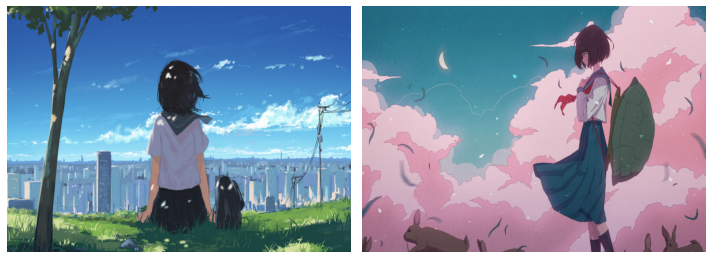

In [86]:
img = cv.imread("girl_grass.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("girl_shell.jpg")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (700, 500)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

show_img_compar(img, img_2)

In [87]:
from sklearn.cluster import KMeans


In [89]:
clt = KMeans(n_clusters=5)
clt.fit(img.reshape(-1,3))


KMeans(n_clusters=5)

In [90]:
clt.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [91]:
clt.cluster_centers_

array([[ 41.85228659,  64.31212557,  61.90380601],
       [172.53817625, 221.37904136, 235.21504878],
       [ 54.843496  , 106.98021191, 176.73173158],
       [ 98.37164517, 160.64994343, 206.22484725],
       [128.23627204, 145.82898051, 124.17839056]])

 базовая Цветовая палитра 

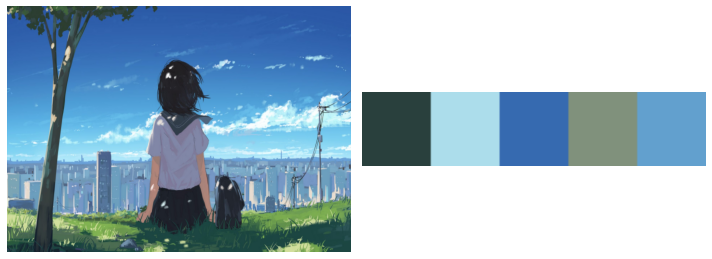

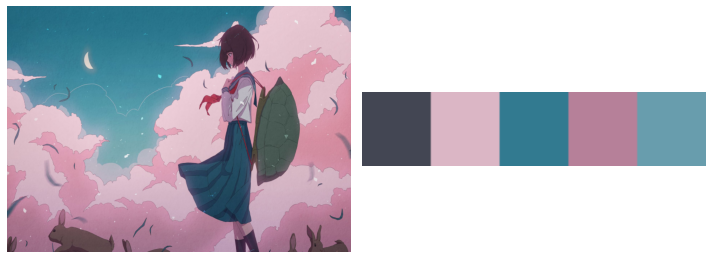

In [92]:
def palette(clusters):
    width=140
    palette = np.zeros((30, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

  
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_2))

Цветовая палитра с пропорциями

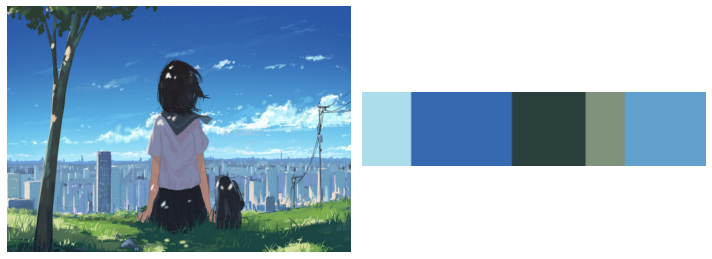

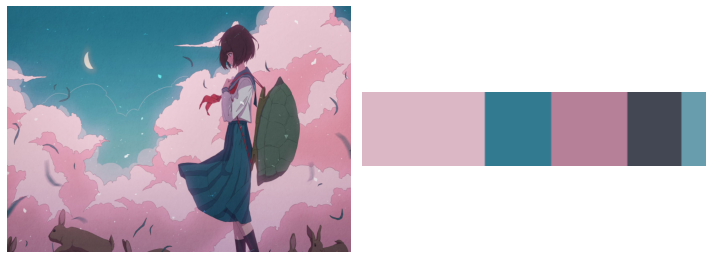

In [93]:
from collections import Counter
def palette_perc(k_cluster):
    width = 140
    palette = np.zeros((30, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette
    
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette_perc(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette_perc(clt_2))
